<a href="https://colab.research.google.com/github/wangyiiing/MPA-MLF_Lab/blob/main/MPA_MLF_Lab7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # MKA-MLF, Lab_07 Convolutional Neural Networks

## Exercise - XOR Gate

## Exercise - Hand-written digits recognition

Create CNN which will process and recognize handwritten digits. For this purposes please use the MNIST database (Modified National Institute of Standards and Technology database) which is a large database of handwritten digits that is commonly used for training various image processing systems.

The datasample of the MNIST datasets can be see in the following picture

![mnist_data_sample.png](attachment:eb3e0d6a-ccb0-499d-9847-ecbc554dbce0.png)

### Task description

In the terms of machine learning, the Hand-written digits recognition can be threated as a multi-class classification problem. This is very important knowledge to structure our model in the correct way (Especially the output-layer, including the number of neurons and activations function and the overall loss function and classification metrics)

### 0. Import libraries

Import the all necessary libraries, you can get inspired by the previous exercises. You can improst the libraries gradually, when do you progressing with the task

In [2]:
from tensorflow import keras
from keras.models import Sequential
from keras.datasets import mnist
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical

###################################
# Write your own code here #



###################################
font = {'weight' : 'bold',
        'size'   : 12}

matplotlib.rc('font', **font)

### 1. Dataset

#### 1.1 Load Dataset

You can load the dataset using the following code

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

#check the shape
print(X_train.shape)
print(X_test.shape)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)


#### 1.2 Dataset examination

Using the following code, display random images,

In [4]:
def display_random_images(x_data: np.array, y_data: np.array, count: int = 10) -> None:
  index = np.array(len(x_data))
  selected_ind = np.random.choice(index, count)

  selected_img = x_data[selected_ind]
  selected_labels = y_data[selected_ind]
  concat_img = np.concatenate(selected_img, axis=1)

  plt.figure(figsize=(20,10))
  plt.imshow(concat_img, cmap="gray")

  for id_label, label in enumerate(selected_labels):
    plt.text(14 + 28*id_label, 28*(5/4), label)
  plt.axis('off')
  plt.show()

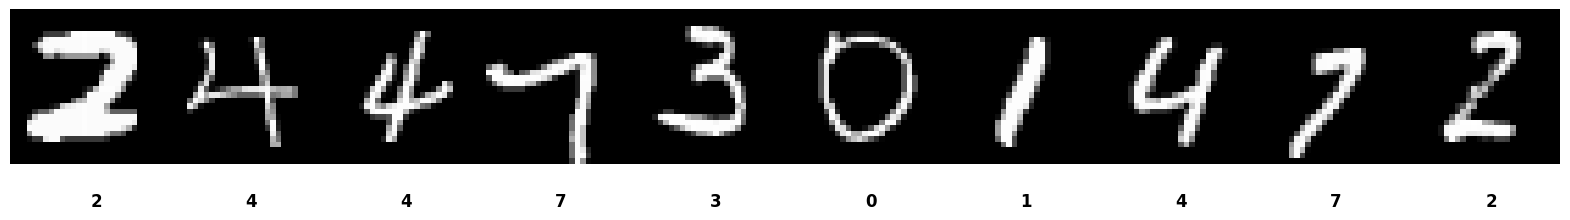

In [5]:
display_random_images(X_train, y_train)

Examine the dataset. Answer for yourself the following questions:

- What kind of data occurs in our dataset?

Handwritten digits(0 to 9) as grayscale images. Each image is a 28x28 grid of pixel intensities (0-255).

- How many data samples do we have in train and test datasets?

Traning set:60,000 samples.
Test set: 10,000 samples.

- How many colour channels does the input variable have?

1 channel (grayscale). The input images are stored as 2D arrays (28, 28) but need to be reshaped to (28, 28, 1) for compatibility with convolutional layers.

- What is the size of the input images?

Each image is 28x28 pixels.

- What is the necessary preprocessing of the input data X?

Reshape: Add a channel dimension (e.g., X_train.reshape(60000, 28, 28, 1)).
Normalization: Scale pixel values to [0, 1] by dividing by 255.0.
Data type: Convert to float32 for computational efficiency.

- How many classes do we have in target varoable?

10 classes (digits 0 through 9).

- What is the necessary preprocessing of target variable y?

One-hot encoding: Convert integer labels (e.g., y_train = 5) to categorical vectors (e.g., [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]). Use to_categorical(y_train, 10).

#### 1.3 Dataset preprocessing

Perform the necessary data preprocessing. The best way to preprocess the data would be one hot encoding for the target variable and normalization for the input variable (using min-max or z-score normalization)

In [6]:
###################################
# Write your own code here #

# Normalize input data (Min-Max Scaling)
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Reshape data to add the channel dimension (28,28,1)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# One-hot encode labels
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Verify shapes
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

###################################

X_train shape: (60000, 28, 28, 1), y_train shape: (60000, 10)
X_test shape: (10000, 28, 28, 1), y_test shape: (10000, 10)


### 2. Build the model

In this section, your task will be to define the model architecture. The intial structure can be defined as follows:

Input_layer -> Convolutional_layer(kernel_size=(3,3), no_channels=32) -> Maxpooling_layer(kernel_size=(2, 2)) -> Flatten_layer -> Dense_layer (num_classes)
    
    


#### 2.1 Define the model structure

In [7]:
###################################
# Write your own code here #

# Define the model
model = Sequential([
    Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(10, activation='softmax')  # Output layer with 10 classes
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()


###################################


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        54,090 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 54,410 (212.54 KB)

 Trainable params: 54,410 (212.54 KB)

 Non-trainable params: 0 (0.00 B)

#### 2.2 Compile the model

Build the model, use the relevant metrics, optimizer and loss function. While choosing the metrics and loss function, consider fact that we are are trying to solve the multiclass classification problem

In [8]:
#loss = None
#optimizer = None
#metrics = None
#learning_rate = 0.0

###################################
# Write your own code here #

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define an improved CNN model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),  # Added extra Conv layer
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),  # Dropout to prevent overfitting
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=15, batch_size=64, validation_split=0.2, verbose=1)



###################################
model.summary()

Epoch 1/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 38s 48ms/step - accuracy: 0.8448 - loss: 0.4894 - val_accuracy: 0.9812 - val_loss: 0.0637
Epoch 2/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 40s 48ms/step - accuracy: 0.9769 - loss: 0.0740 - val_accuracy: 0.9850 - val_loss: 0.0503
Epoch 3/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 42s 49ms/step - accuracy: 0.9838 - loss: 0.0532 - val_accuracy: 0.9868 - val_loss: 0.0442
Epoch 4/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 40s 47ms/step - accuracy: 0.9879 - loss: 0.0413 - val_accuracy: 0.9889 - val_loss: 0.0387
Epoch 5/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 41s 47ms/step - accuracy: 0.9895 - loss: 0.0312 - val_accuracy: 0.9899 - val_loss: 0.0357
Epoch 6/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 40s 46ms/step - accuracy: 0.9918 - loss: 0.0256 - val_accuracy: 0.9898 - val_loss: 0.0368
Epoch 7/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 42s 47ms/step - accuracy: 0.9930 - loss: 0.0224 - val_accuracy: 0.9901 - val_loss: 0.0366
Epoch 8/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 42s 47ms/step - accuracy: 0.9938 - loss: 0.0193 - 

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 675,104 (2.58 MB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 450,070 (1.72 MB)

### 3. Training stage

#### 3.1 Model training

train your model, define the relevant hyperparameters (no. epochs, batch_size), use 20p of the training data for validation

In [ ]:
###################################
# Write your own code here #

# Define training hyperparameters
epochs = 10
batch_size = 32

# Train the model
history = model.fit(
    X_train, y_train,                 # Training data
    epochs=epochs,                     # Number of training cycles
    batch_size=batch_size,             # Number of samples per batch
    validation_split=0.2,              # Use 20% of training data for validation
    verbose=1                          # Show training progress
)

###################################

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 27ms/step - accuracy: 0.9954 - loss: 0.0163 - val_accuracy: 0.9902 - val_loss: 0.0465
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 38s 25ms/step - accuracy: 0.9968 - loss: 0.0103 - val_accuracy: 0.9889 - val_loss: 0.0470
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 38s 25ms/step - accuracy: 0.9967 - loss: 0.0101 - val_accuracy: 0.9908 - val_loss: 0.0460
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 42s 26ms/step - accuracy: 0.9967 - loss: 0.0099 - val_accuracy: 0.9911 - val_loss: 0.0407
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 40s 25ms/step - accuracy: 0.9976 - loss: 0.0071 - val_accuracy: 0.9908 - val_loss: 0.0477
Epoch 6/10
 311/1500 ━━━━━━━━━━━━━━━━━━━━ 25s 21ms/step - accuracy: 0.9959 - loss: 0.0124

#### 3.1 Model Evaluation on validation data

Plot the development of the training and validation loss, and training and validation metrics.

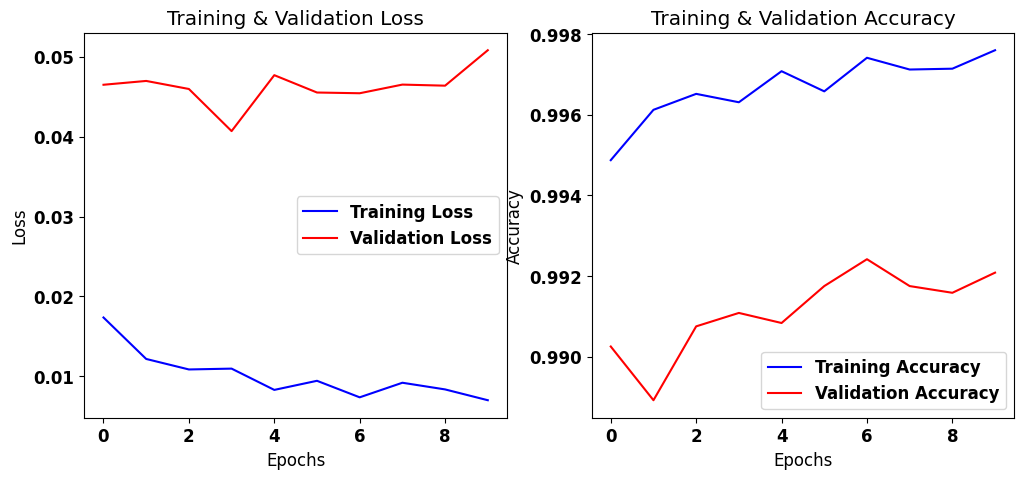

In [10]:
###################################
# Write your own code here #

# Extract loss and accuracy from the training history
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Plot Loss Curves
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(train_loss, label='Training Loss', color='blue')
plt.plot(val_loss, label='Validation Loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training & Validation Loss')
plt.legend()

# Plot Accuracy Curves
plt.subplot(1,2,2)
plt.plot(train_acc, label='Training Accuracy', color='blue')
plt.plot(val_acc, label='Validation Accuracy', color='red')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training & Validation Accuracy')
plt.legend()

plt.show()


###################################

### 4. Model evaluation

Evaluate the model on the testing dataset using the relevant metrics. Use the confusion metrics as the one of the metrics.

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9908 - loss: 0.0385

Test Accuracy: 0.9929
Test Loss: 0.0321
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step


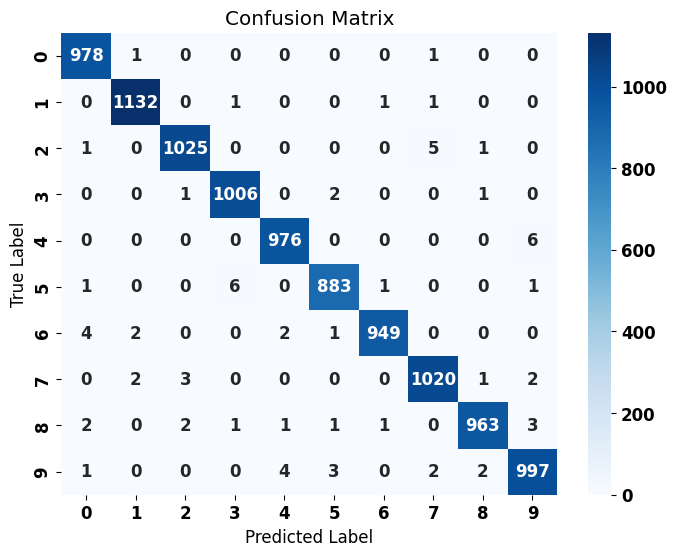

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       1.00      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      1.00      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [11]:
###################################
# Write your own code here #

from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Evaluate on test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)

# Print accuracy
print(f"\nTest Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")

# Predict class probabilities
y_pred_probs = model.predict(X_test)

# Convert probabilities to class labels
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)  # Convert one-hot to class labels

# Compute confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Print detailed classification report
print("Classification Report:\n", classification_report(y_true, y_pred))


###################################

### 5. Hyperparameter tunning and regularization techniques

When your code is ready and fully functional, try several changes in the hyperparameters and see how they influence the testing metrics. Try changes in the network structure. You can also try adding regularization techniques such as L1, L2, and Dropout. Based on the development of training and validation loss, try to identify overfitting and avoid it


Testing configuration: Baseline


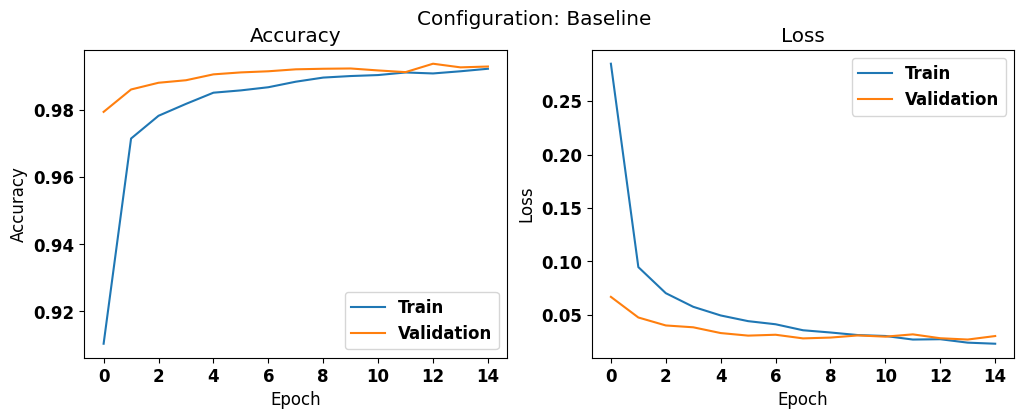


Testing configuration: High_Dropout


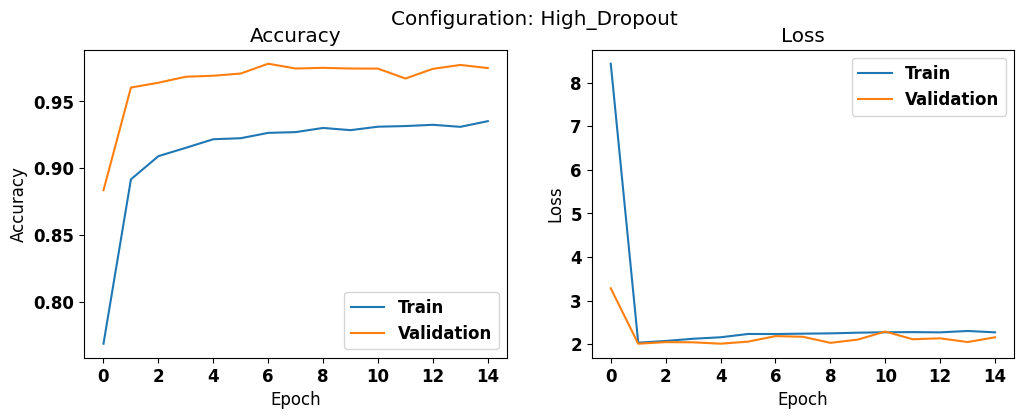


Testing configuration: Complex_Model


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l1_l2
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix

# Define hyperparameter configurations to test
configurations = [
    {
        'name': 'Baseline',
        'learning_rate': 0.001,
        'batch_size': 64,
        'dropout': 0.3,
        'regularization': None,
        'batch_norm': False,
        'extra_layer': False
    },
    {
        'name': 'High_Dropout',
        'learning_rate': 0.001,
        'batch_size': 128,
        'dropout': 0.5,
        'regularization': (0.01, 0.01),  # (l1, l2)
        'batch_norm': True,
        'extra_layer': False
    },
    {
        'name': 'Complex_Model',
        'learning_rate': 0.0005,
        'batch_size': 32,
        'dropout': 0.4,
        'regularization': (0.001, 0.001),
        'batch_norm': True,
        'extra_layer': True
    }
]

results = []

def build_model(config):
    model = Sequential()

    # First convolutional block
    model.add(Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
    if config['batch_norm']:
        model.add(BatchNormalization())
    model.add(MaxPooling2D(2,2))
    model.add(Dropout(config['dropout']))

    # Second convolutional block
    model.add(Conv2D(64, (3,3), activation='relu'))
    if config['batch_norm']:
        model.add(BatchNormalization())
    model.add(MaxPooling2D(2,2))
    model.add(Dropout(config['dropout']))

    # Optional third block
    if config['extra_layer']:
        model.add(Conv2D(128, (3,3), activation='relu'))
        model.add(MaxPooling2D(2,2))
        model.add(Dropout(config['dropout']))

    # Dense layers
    model.add(Flatten())
    if config['regularization']:
        model.add(Dense(128, activation='relu',
                      kernel_regularizer=l1_l2(*config['regularization'])))
    else:
        model.add(Dense(128, activation='relu'))

    model.add(Dropout(config['dropout']))
    model.add(Dense(10, activation='softmax'))

    model.compile(optimizer=Adam(learning_rate=config['learning_rate']),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Test each configuration
for config in configurations:
    print(f"\nTesting configuration: {config['name']}")
    print("=====================================")

    # Build and train model
    model = build_model(config)
    history = model.fit(X_train, y_train,
                        epochs=15,
                        batch_size=config['batch_size'],
                        validation_split=0.2,
                        verbose=0)

    # Evaluate
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)

    # Store results
    results.append({
        'Config': config['name'],
        'Test Accuracy': test_acc,
        'Test Loss': test_loss,
        'Training Accuracy': history.history['accuracy'][-1],
        'Validation Accuracy': history.history['val_accuracy'][-1],
        'Parameters': model.count_params()
    })

    # Plot learning curves
    plt.figure(figsize=(12,4))
    plt.suptitle(f"Configuration: {config['name']}")

    plt.subplot(1,2,1)
    plt.plot(history.history['accuracy'], label='Train')
    plt.plot(history.history['val_accuracy'], label='Validation')
    plt.title('Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(history.history['loss'], label='Train')
    plt.plot(history.history['val_loss'], label='Validation')
    plt.title('Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()

    plt.show()

# Compare results
results_df = pd.DataFrame(results)
print("\nComparative Results:")
print(results_df[['Config', 'Test Accuracy', 'Test Loss', 'Parameters']])

# Generate detailed report for best configuration
best_config = results_df.iloc[results_df['Test Accuracy'].idxmax()]
best_model = build_model(configurations[results_df['Test Accuracy'].idxmax()])
best_model.fit(X_train, y_train, epochs=15, batch_size=best_config['batch_size'], verbose=0)

y_pred = best_model.predict(X_test).argmax(axis=1)
y_true = y_test.argmax(axis=1)

print("\nBest Configuration Classification Report:")
print(classification_report(y_true, y_pred))

plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix(y_true, y_pred),
            annot=True, fmt='d', cmap='Blues',
            xticklabels=range(10), yticklabels=range(10))
plt.title('Confusion Matrix - Best Configuration')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()